In [426]:
import yfinance as yf
import pandas as pd

In [427]:
ticker='BYD'

In [428]:
df=yf.download(ticker,start='2015-01-01')['Close']
df

C:\Users\user\AppData\Local\Temp\ipykernel_17760\2419777530.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,BYD
Date,
2015-01-02,11.779482
2015-01-05,11.628823
2015-01-06,11.449918
2015-01-07,11.779482
2015-01-08,12.090213
...,...
2025-08-06,83.300003
2025-08-07,82.129997
2025-08-08,81.970001


In [429]:
mtl_df=df.resample('ME').last()#Monthly data
mtl_df

Ticker,BYD
Date,
2015-01-31,12.297365
2015-02-28,13.003567
2015-03-31,13.370793
2015-04-30,12.429192
2015-05-31,13.474374
...,...
2025-04-30,68.970146
2025-05-31,74.785828
2025-06-30,78.230003


In [430]:
mtl_ret=mtl_df.pct_change().dropna()
mtl_ret

Ticker,BYD
Date,
2015-02-28,0.057427
2015-03-31,0.028240
2015-04-30,-0.070422
2015-05-31,0.084091
2015-06-30,0.044724
...,...
2025-04-30,0.050281
2025-05-31,0.084322
2025-06-30,0.046054


In [431]:
mtl_ret_12=mtl_df.pct_change(10).dropna()
mtl_ret_12

Ticker,BYD
Date,
2015-11-30,0.500000
2015-12-31,0.438813
2016-01-31,0.254225
2016-02-29,0.312121
2016-03-31,0.443745
...,...
2025-04-30,0.264558
2025-05-31,0.241210
2025-06-30,0.316760


In [432]:
tog=mtl_ret_12.join(mtl_ret,on='Date',lsuffix='r_12',rsuffix='r_1')
tog

Ticker,BYDr_12,BYDr_1
Date,,
2015-11-30,0.500000,-0.020010
2015-12-31,0.438813,0.014293
2016-01-31,0.254225,-0.103674
2016-02-29,0.312121,-0.027512
2016-03-31,0.443745,0.192841
...,...,...
2025-04-30,0.264558,0.050281
2025-05-31,0.241210,0.084322
2025-06-30,0.316760,0.046054


In [433]:
tog[f'{ticker}r_1']=tog[f'{ticker}r_1'].shift(-1)
tog

Ticker,BYDr_12,BYDr_1
Date,,
2015-11-30,0.500000,0.014293
2015-12-31,0.438813,-0.103674
2016-01-31,0.254225,-0.027512
2016-02-29,0.312121,0.192841
2016-03-31,0.443745,-0.097773
...,...,...
2025-04-30,0.264558,0.084322
2025-05-31,0.241210,0.046054
2025-06-30,0.316760,0.085261


In [434]:
tog.dropna(inplace=True)
tog

Ticker,BYDr_12,BYDr_1
Date,,
2015-11-30,0.500000,0.014293
2015-12-31,0.438813,-0.103674
2016-01-31,0.254225,-0.027512
2016-02-29,0.312121,0.192841
2016-03-31,0.443745,-0.097773
...,...,...
2025-03-31,0.248105,0.050281
2025-04-30,0.264558,0.084322
2025-05-31,0.241210,0.046054


In [435]:
tog['Signal']=(tog[f'{ticker}r_12']>0).astype(int)
tog

Ticker,BYDr_12,BYDr_1,Signal
Date,,,
2015-11-30,0.500000,0.014293,1
2015-12-31,0.438813,-0.103674,1
2016-01-31,0.254225,-0.027512,1
2016-02-29,0.312121,0.192841,1
2016-03-31,0.443745,-0.097773,1
...,...,...,...
2025-03-31,0.248105,0.050281,1
2025-04-30,0.264558,0.084322,1
2025-05-31,0.241210,0.046054,1


In [436]:
tog['Strategy_return']=tog['Signal']*tog[f'{ticker}r_1']
tog

Ticker,BYDr_12,BYDr_1,Signal,Strategy_return
Date,,,,
2015-11-30,0.500000,0.014293,1,0.014293
2015-12-31,0.438813,-0.103674,1,-0.103674
2016-01-31,0.254225,-0.027512,1,-0.027512
2016-02-29,0.312121,0.192841,1,0.192841
2016-03-31,0.443745,-0.097773,1,-0.097773
...,...,...,...,...
2025-03-31,0.248105,0.050281,1,0.050281
2025-04-30,0.264558,0.084322,1,0.084322
2025-05-31,0.241210,0.046054,1,0.046054


In [437]:
tog['cumul_strat_ret']=(1+tog['Strategy_return']).cumprod()
tog

Ticker,BYDr_12,BYDr_1,Signal,Strategy_return,cumul_strat_ret
Date,,,,,
2015-11-30,0.500000,0.014293,1,0.014293,1.014293
2015-12-31,0.438813,-0.103674,1,-0.103674,0.909137
2016-01-31,0.254225,-0.027512,1,-0.027512,0.884125
2016-02-29,0.312121,0.192841,1,0.192841,1.054620
2016-03-31,0.443745,-0.097773,1,-0.097773,0.951506
...,...,...,...,...,...
2025-03-31,0.248105,0.050281,1,0.050281,1.617133
2025-04-30,0.264558,0.084322,1,0.084322,1.753492
2025-05-31,0.241210,0.046054,1,0.046054,1.834247


In [438]:
tog['cumul_market_ret']=(1+tog[f'{ticker}r_1']).cumprod()
tog

Ticker,BYDr_12,BYDr_1,Signal,Strategy_return,cumul_strat_ret,cumul_market_ret
Date,,,,,,
2015-11-30,0.500000,0.014293,1,0.014293,1.014293,1.014293
2015-12-31,0.438813,-0.103674,1,-0.103674,0.909137,0.909137
2016-01-31,0.254225,-0.027512,1,-0.027512,0.884125,0.884125
2016-02-29,0.312121,0.192841,1,0.192841,1.054620,1.054620
2016-03-31,0.443745,-0.097773,1,-0.097773,0.951506,0.951506
...,...,...,...,...,...,...
2025-03-31,0.248105,0.050281,1,0.050281,1.617133,3.739020
2025-04-30,0.264558,0.084322,1,0.084322,1.753492,4.054301
2025-05-31,0.241210,0.046054,1,0.046054,1.834247,4.241017


<Axes: xlabel='Date'>

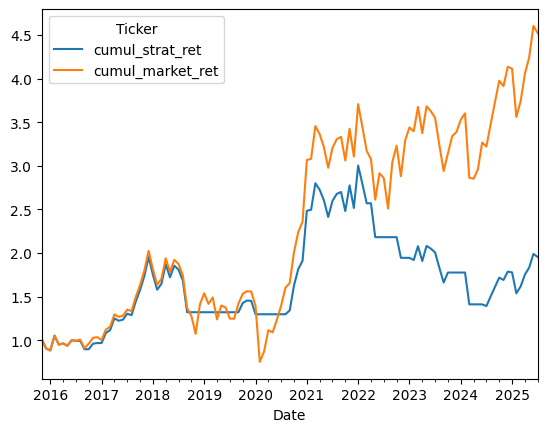

In [439]:
tog[['cumul_strat_ret','cumul_market_ret']].plot()